In [228]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from random import shuffle
import random
import math
import spectral
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

import warnings; warnings.simplefilter('ignore')

#Global parameters
rpca_n_components = 30
patch_size = 1
n_classes = 16
test_fraction = 0.2
n_samples = 200

In [229]:
input_mat= scipy.io.loadmat('Indian_pines.mat')['indian_pines']
groundtruth_mat = scipy.io.loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [230]:
#inputm_mat

In [231]:
#groundtruth_mat

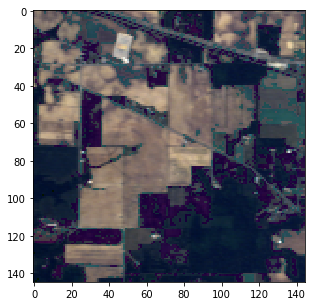

In [232]:
image = spectral.imshow(input_mat, bands=(29, 19, 9), figsize = (5,5))

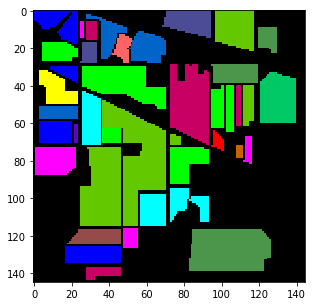

In [233]:
ground_truth = spectral.imshow(classes = groundtruth_mat, figsize = (5,5))

In [234]:
#scale the value from 0 to 1

input_mat = input_mat.astype(float)
input_mat -= np.min(input_mat)
input_mat /= np.max(input_mat)

In [235]:
hight = input_mat.shape[0]
width = input_mat.shape[1]
band = input_mat.shape[2]

print("hight:", hight, " width:", width, " band:", band)

hight: 145  width: 145  band: 220


In [236]:
#normalized the value

mean_array = np.ndarray(shape=(band,),dtype=float)
for i in range(band):
    mean_array[i] = np.mean(input_mat[:,:,i])
    input_mat[:,:,i] -= mean_array[i]

In [237]:
#reduce dimensions based on rpca_n_compoonents

input_mat_1D = np.reshape(input_mat, (-1, input_mat.shape[2]))
rpca = RandomizedPCA(n_components=rpca_n_components, whiten=False)
input_mat_1D_reduced = rpca.fit_transform(input_mat_1D)
input_mat_reduced = np.reshape(input_mat_1D_reduced, (input_mat.shape[0], input_mat.shape[1], -1))
print(input_mat_reduced.shape)
print(rpca.explained_variance_ratio_.sum())

(145, 145, 30)
0.9924030283844074


In [238]:
#decompose based on the patch_size

lower = int(math.floor(patch_size / 2))
upper = int(math.ceil(patch_size / 2))

def decompose(x,y):
    height_slice = slice(x - lower, x + upper)
    width_slice = slice(y - lower, y + upper)
    patch = input_mat_reduced[height_slice, width_slice, :]
    
    return np.array(patch)

In [239]:
classes = []
for i in range(n_classes):
    classes.append([])

In [240]:
for i in range(lower, hight - upper + 1):
    for j in range(lower, width - upper + 1):
        curr_inp = decompose(i,j)
            
        curr_tar = groundtruth_mat[i, j]
        if(curr_tar != 0): 
            classes[curr_tar-1].append(curr_inp)

In [241]:
for i in classes:
    print(len(i))

46
1428
830
237
483
730
28
478
20
972
2455
593
205
1265
386
93


In [242]:
train_patch, train_label, test_patch, test_label = [], [], [], []

for i in range(n_classes):
    test_size = int(len(classes[i])*test_fraction)
        
    patches = classes[i]
    shuffle(patches)
    
    train_patch.append(patches[:-test_size])
        
    test_patch.extend(patches[-test_size:])
    test_label.extend(np.full(test_size, i, dtype=int))

    
for i in range(n_classes):
    if(len(train_patch[i]) < n_samples):
        tmp = train_patch[i]
        for j in range(int(n_samples/len(train_patch[i]))):
            shuffle(train_patch[i])
            train_patch[i] += tmp
    shuffle(train_patch[i])
    train_patch[i] = train_patch[i][:n_samples]

In [243]:
for i in train_patch:
    print(len(i))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [247]:
print(train_patch[0][0].shape)
train_patch = np.asarray(train_patch)
print(train_patch.shape)
train_patch = train_patch.reshape((-1,patch_size, patch_size, rpca_n_components))
print(train_patch.shape)

(1, 30)
(3200, 1, 1, 30)
(3200, 1, 1, 30)


In [248]:
train_label = np.array(train_label)
for i in range(n_classes):
    train_label = np.append(train_label, np.full(n_samples, i, dtype=int))

In [249]:
print(len(train_label))

6400
